# Spark foundation intern project - Task 1

## Mirthula

### Simple Linear Regression :
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the data set
df = pd.read_csv("Student_scores.csv")

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Plotting 2D vizualization graph to our data to check out the relationship in our data**

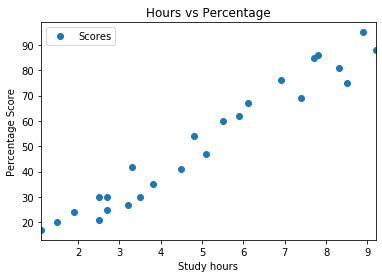

In [6]:
df.plot(x='Hours',y='Scores', style='o')
plt.xlabel('Study hours')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Data Preparation and training 

In [7]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values  

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training successfully completed")

Training successfully completed


In [10]:
y_pred = lr.predict(X_test)

### Plotting the regression line

In [11]:
coefficient = lr.coef_
intercept = lr.intercept_
print("Coefficient {}".format(coefficient[0]))
print("Intercept {}".format(intercept))


Coefficient 9.958192132017091
Intercept 1.8707455429497628


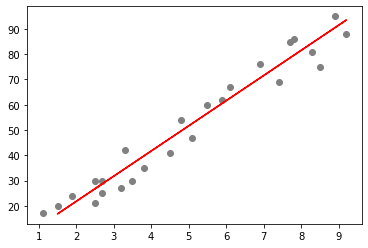

In [12]:
plt.scatter(X,y,color='grey')
plt.plot(X_test,y_pred,color='red')
plt.show()

### Comparing and making new Predictions

In [13]:
new_df=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
new_df

,Actual,Predicted
0,30,26.766226
1,88,93.486113
2,35,39.711876
3,20,16.808034
4,25,28.757864


In [14]:
hours_1 = [[9.25]]
own_pred_1 = lr.predict(hours_1)
print("No of Hours = {}".format(hours_1[0][0]))
print("Predicted Score = {}".format(own_pred_1[0]))

No of Hours = 9.25
Predicted Score = 93.98402276410785


In [15]:
hours_2 = [[3]]
own_pred_2 = lr.predict(hours_2)
print("No of Hours = {}".format(hours_2[0][0]))
print("Predicted Score = {}".format(own_pred_2[0]))

No of Hours = 3
Predicted Score = 31.745321939001037


### Evaluating error and accuracy

In [16]:
accuracy = lr.score(X_test,y_test)
print(accuracy)

0.9714834608072798


In [17]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
r2= metrics.r2_score(y_test,y_pred)
print('Mean Absolute Error {}'.format(MAE))
print('Mean Squared Error {}'.format(MSE))
print('Root Mean Squared Error {}'.format(RMSE))
print('R2 Score {}'.format(r2))

Mean Absolute Error 4.076318697509944
Mean Squared Error 17.413339492642717
Root Mean Squared Error 4.1729293658822835
R2 Score 0.9714834608072798
